<h1><center>Gregynog 2018 - Handling Big Data<center></h1>
<h1><center>Why aren't we using the cloud?</center></h1>
<h3><center><a href="http://einon.net/cloud-bigdata">einon.net/cloud-bigdata</a></center></h3>
<h3><center>Mark Einon, HPC Systems Manager</center></h3>
<h3><center>MRC Centre for Neuropsychiatric Genetics &amp; Genomics</center></h3>
<h3><center>einonm@cardiff.ac.uk</center></h3>

# What is big data?

* No accepted single definition, may mean many things to many people


* E.g. [Forbes "12 Big Data Definitions: What's Yours?"](https://www.forbes.com/sites/gilpress/2014/09/03/12-big-data-definitions-whats-yours/)


### A practical definition...

### <center> Big Data: data that can't be handled by a single computer</center>



<center>(Due to memory / disk / processor / time constraints)</center>

# What is the cloud?

* Again, many definitions exist

### A practical definition:

### <center>The Cloud: someone else's computer</center>

* Hired storage & compute on another computer
* These computers are *virtual* - virtual machines (VMs), or 'containers'
* Almost like renting a car as opposed to buying one...but not quite
* More like renting parts of a kit car and assembling it yourself

# Why aren't we using the cloud?

* **Ethics**
* **Financing**
* **Effect on working practices**

# The need for speed

* programs written to utilise many processors (split-apply-combine / map-reduce)
* bottleneck is the number of processors
* the cloud can give you as many processors as you need
* ...giving greater flexibility - and the ability to scale arbitrarily

#### <center>With the right kit car, you too can be Jensen Button!</center>

## Taking the cloud-as-a-kitcar (CAAK) analogy too far...

* These virtual systems must be given an OS and software
* Setup could come pre-configured, if using a well-known pipeline
* Vendors may also provide pre-configured systems (often to encourage lock-in)

* Scaling involves creating/destroying machines as needed 
* Pricing implies that in the cloud machines should be created quickly, in an automated way

#### <center>We have to be a Henry Ford as well as a Jensen Button!</center>

* ***All HPC team managed systems are aligned with this paradigm, meaning they can easily be transferred to cloud infrastructure***

# Shifting big loads

* Big data storage is charged seperately
* Transferring data to/from cloud servers may also be chargable, and data once locked to a vendor cloud can cost to transfer out. 
* The logistics of big data must be managed effectively, not duplicated and data usage / lifecycle planned in advance.

#### <center>We have to be an Eddie Stobart, a Henry Ford and a Jensen Button!</center>

# Ethics

* "The ethics don't allow it"?
* Can I have that in writing?

* Legal situation changing. E.g GDPR / CLOUD act... 
* ["Through the CLOUD Act, U.S. law enforcement officials at any level, from local police to federal agents, can force tech companies to turn over user data regardless of where the company stores the data."](https://futurism.com/everything-need-know-cloud-act/)

# Financing

### But is the cloud actually cheaper?

* Owning infrastructure mainly a large up-front cost
* Pay for cloud resources only when needed
* Well understood that there exists a cost/usage crossover point - below a certain usage the cloud is cheaper compared to owning and managing your own infrastructure.

In [19]:
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
''')

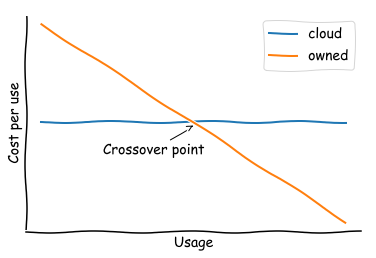

In [18]:
from matplotlib import pyplot as plt
import numpy as np

plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel("Usage")
ax.set_ylabel("Cost per use")
plt.xticks([])
plt.yticks([])

data1 = np.ones(100) 
data2 = -np.arange(100) + 50

plt.annotate(
    'Crossover point',
    xy=(50, 0), arrowprops=dict(arrowstyle='->'), xytext=(20, -15))

plt.plot(data1, label="cloud")
plt.plot(data2, label="owned")
plt.legend()
plt.show()

### Financing continued...

* Where does this crossover point exist for our use cases? - difficult to tell
* Cloud use billed monthly (No wiggle room if cash runs out?)


* Current centre grant only allows spending at ARCCA
* Asking for whole of computing costs that aren't supported/subsidised by uni infrastructure may put cloud-only grant applications at a disadvantage.

## Sequencing challenge 

* Sequence 500,000 exomes to VCF
* 1 exome -> 10 GigaBytes => 500,000 exomes -> 5 PetaBytes
* 4.5 hrs per exome, 20GB mem => 2,250,000 CPU hours 

#### Self-hosted
* 5PB storage (£266/TB replicated for 5 years) = £1,330,000 
* Assuming 40 core, 180GB nodes => 225,000 node hours @ 10 exomes per node
* get it done in 1 month -> 312 nodes needed, at 8k a node = £2,500,000
* get it done in 6 months -> 52 nodes needed, at 8k a node = £416,000

#### Cloud
* [Using google genomics](https://cloud.google.com/compute/pricing)
* Storage is \$0.022/GB/mo. For 5PB for 5 years = \$6,600,000 => £4,645,080
* compute @\$4.56 per hour for 18 exomes per node on 'n1-standard-96' => 125,000 node hours
* get it done in ~4.5 hours, assuming all nodes available = \$570,000 => £401,282 

### Assuming both ethics and financials are no longer issues...

# Effect on working practices

* Pipelines, data volumes must be well understood and constant
* Total compute time & storage arrangements for project needs to be estimated with enough accuracy
* Planning burden is greater in the cloud - 'failure to plan is planning to fail', exploratory analyses implies unknown costs
* changing the analyis changes the costs
* Version control (git), machine configuration management (ansible) become essential tools
* Possibility of using cloud for big raw sequence processing, local systems for subsequent analysis?